In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sarcasmdetect/training_data.csv
/kaggle/input/sarcasmdetect/test_data.csv
/kaggle/input/sarcasmdetect/sample_submisson.csv


2024-05-16 19:44:05.751314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 19:44:05.751443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 19:44:05.877598: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


33762 230089
is_sarcastic
0    11990
1    10905
Name: count, dtype: int64 



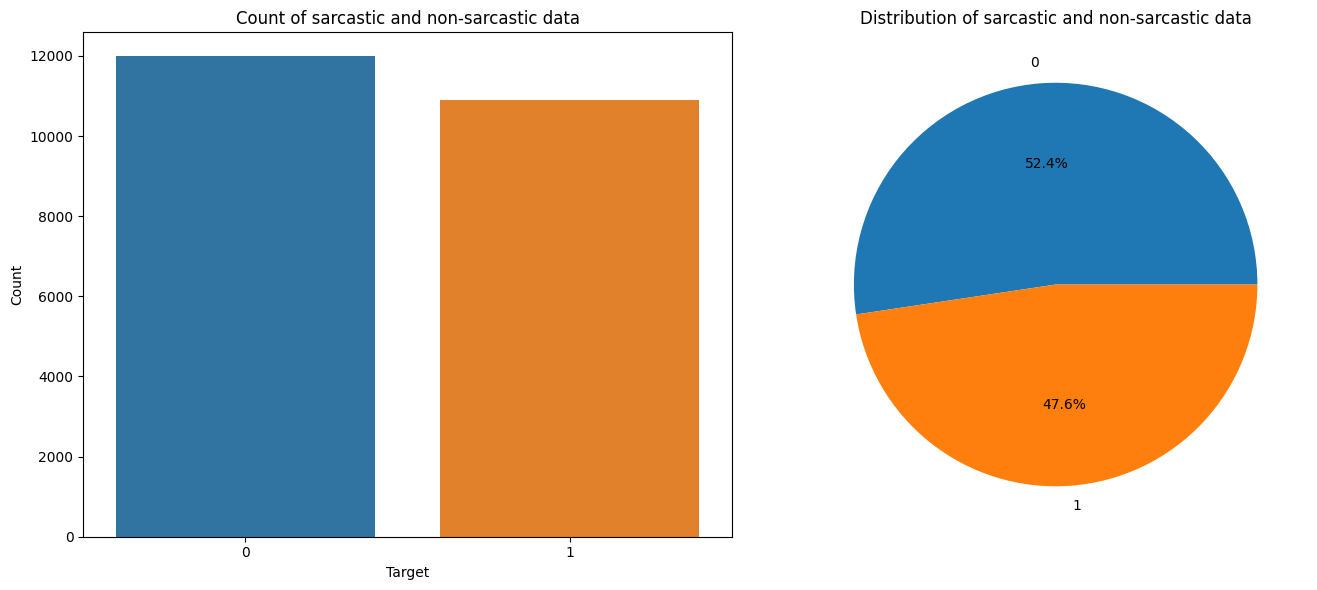

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
Extraction completed successfully.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
There are 1449843 words in the combination of all review.


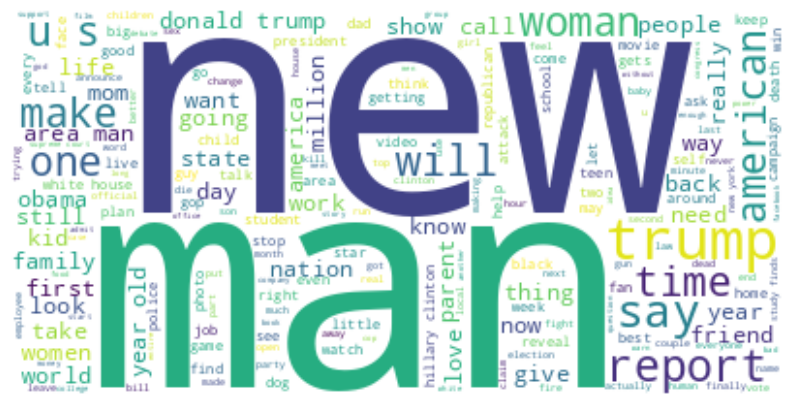

There are 1449843 words in the combination of all review.
Maximum word count: 39


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

NameError: name 'MAX_LENGTH' is not defined

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from transformers import TFBertModel, BertTokenizer
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

# Read CSV file into DataFrame
data = pd.read_csv("/kaggle/input/sarcasmdetect/training_data.csv")
# Rename columns
data.rename(columns={'text': 'headline', 'label': 'is_sarcastic'}, inplace=True)
# Display the first few rows of the DataFrame
(data.head())
def find_num_words(data):
    wordlist = []
    splitting_list = data.str.split()
    for i in range(len(splitting_list)):
        for j in range(len(splitting_list[i])):
            wordlist.append(splitting_list[i][j])
            
    wordset = set(wordlist)
    
    print(len(wordset),len(wordlist))

find_num_words(data.headline)
import seaborn as sns
import matplotlib.pyplot as plt

# Print value counts
print(data.is_sarcastic.value_counts(), "\n")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot bar plot
sns.countplot(x="is_sarcastic", data=data, ax=ax[0])
ax[0].set_title("Count of sarcastic and non-sarcastic data")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Target")

# Plot pie chart
ax[1].pie(data["is_sarcastic"].value_counts().values, explode=[0, 0], labels=data.is_sarcastic.value_counts().index, autopct='%1.1f%%')
ax[1].set_title("Distribution of sarcastic and non-sarcastic data")

plt.tight_layout()
plt.show()
import nltk
import os
import zipfile

# Define the path for the NLTK data directory within /kaggle/working
nltk_data_dir = '/kaggle/working/nltk_data'

# Create the nltk_data directory if it doesn't exist
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Add the path of the nltk_data directory to the NLTK data path list
nltk.data.path.append(nltk_data_dir)

# Download the WordNet corpus
nltk.download('wordnet', download_dir=nltk_data_dir)
import zipfile
import os

# Define the path to the ZIP file
zip_file_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'  # Replace this with the path to your ZIP file

# Extract the directory where the ZIP file is located
extract_dir = os.path.dirname(zip_file_path)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed successfully.")
from nltk.corpus import stopwords 
import re
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

#Removing punctiation marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing special characters
def remove_specialchars(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords and lemmatization
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)


#Total function
def cleaning(text):
    text = remove_punctuations(text)
    text = remove_specialchars(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

# data['headline']=data['headline'].apply(cleaning)
from wordcloud import WordCloud
text = " ".join(review for review in data.headline)
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
from wordcloud import WordCloud
text = " ".join(review for review in data.headline)
print ("There are {} words in the combination of all review.".format(len(text)))


labels = data['is_sarcastic'].values
sentences = data['headline'].values
def max_word_count(sentences):
    max_count = 0
    for sentence in sentences:
        words = sentence.split()
        word_count = len(words)
        if word_count > max_count:
            max_count = word_count
    return max_count

max_count = max_word_count(sentences)

# Print the result
print("Maximum word count:", max_count)
def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length= MAX_LENGTH,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    
    ids.append(encoding['input_ids'])
  return ids
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)
#Train test split
train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.15)

train_ids = encoder(train_sents)
test_ids = encoder(test_sents) 


train_ids = tf.convert_to_tensor(train_ids)
test_ids = tf.convert_to_tensor(test_ids)
test_labels = tf.convert_to_tensor(test_labels)
train_labels = tf.convert_to_tensor(train_labels)

model = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="input_word_ids")  
embedding = model([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)    

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)  

model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x = train_ids, y = train_labels, epochs = 2, verbose = 1, batch_size = 32, validation_data = (test_ids, test_labels))
from transformers import AutoTokenizer, AutoModel
from transformers import TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

#Train test split
train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.15)

train_ids = encoder(train_sents)
test_ids = encoder(test_sents) 

# Convert lists to numpy arrays
train_ids = np.array(train_ids)
test_ids = np.array(test_ids)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

def create_fine_tuned_model(num_labels=1):
    
    # Define additional fine-tuning layers
    dense1 = tf.keras.layers.Dense(256, activation='relu')
    dense2 = tf.keras.layers.Dense(128, activation='relu')
    output_layer = tf.keras.layers.Dense(num_labels, activation='sigmoid')

    # Initialize DistilBERT model
    distil_bert = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

    # Build the model
    inputs = tf.keras.Input(shape=(MAX_LENGTH,), dtype='int32')
    distil_bert_output = distil_bert(inputs)[0]
    x = dense1(distil_bert_output)
    x = dense2(x)
    outputs = output_layer(x)
    model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss = tf.keras.losses.BinaryCrossentropy() if num_labels == 1 else tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = ['accuracy']
    model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model2

def fine_tune_model(model2, train_ids, train_labels, test_ids, test_labels, num_epochs=2, batch_size=16, validation_split=0.1):
    # Train the model
    history = model2.fit(train_ids, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_ids, test_labels)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    return history


model2 = create_fine_tuned_model(num_labels=1)  # Change num_labels if you have multi-class classification
history1 = fine_tune_model(model2, train_ids, train_labels, test_ids, test_labels)
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


    
# Determine label based on prediction (assuming rounding for binary classification)
bert_pred = model.predict(test_ids)
label = np.round(bert_pred) 
class_labels = ['Not Sarcastic', 'Sarcastic']
# Calculate accuracy
accuracy_model1 = accuracy_score(test_labels, label)

# Generate confusion matrix
cm_model1 = confusion_matrix(test_labels, label)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model1, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Model 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display accuracy table
print("Accuracy of Model 1:", accuracy_model1)

from sklearn.metrics import classification_report

# Generate classification report
report_model1 = classification_report(test_labels, label, target_names=class_labels)

# Display classification report
print("Classification Report - Model 1:")
print(report_model1)
test_data = pd.read_csv("/kaggle/input/sarcasmdetect/test_data.csv")
test_data.rename(columns={'text': 'headline'}, inplace=True)
sentences = test_data['headline'].values
sentences = np.array(sentences)
test_data_ids = encoder(sentences)
test_data_ids = tf.convert_to_tensor(test_data_ids)
predictions1 = model.predict(test_data_ids)
predictions2 = model2.predict(test_data_ids)
combined_predictions = (predictions1 + predictions2) / 2
(combined_predictions)
result_df = pd.DataFrame(columns=['ID', 'label'])

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
    # Get the ID from the current row
    id_value = row['ID']
    
    # Get the corresponding prediction
    prediction = combined_predictions[index]  # Assuming predictions are in the same order as the DataFrame
    
    # Determine label based on prediction (assuming rounding for binary classification)
    label = round(prediction[0])  # Assuming prediction is a single value
    
    # Add a new row to the DataFrame
    result_df.loc[index] = [id_value, label]

# Export the DataFrame to a CSV file
result_df.to_csv("predictions.csv", index=False)

In [3]:
import pandas as pd

# Read CSV file into DataFrame
data = pd.read_csv("/kaggle/input/sarcasmdetect/training_data.csv")
# Rename columns
data.rename(columns={'text': 'headline', 'label': 'is_sarcastic'}, inplace=True)
# Display the first few rows of the DataFrame
(data.head())


,ID,article_link,headline,is_sarcastic
0,4724,https://www.huffingtonpost.com/entry/trump-rea...,"how trump really feels about queer people, exp...",0
1,26559,https://www.huffingtonpost.com/entry/egyptian-...,egyptian death sentence for soccer fans puts p...,0
2,24613,https://www.theonion.com/stripper-failing-scho...,stripper failing school she's working self thr...,1
3,9048,https://www.huffingtonpost.com/entry/ken-paxto...,texas attorney general ken paxton indicted,0
4,69,https://www.huffingtonpost.com/entry/debbie-di...,congresswoman fights for gun control because s...,0


In [4]:
def find_num_words(data):
    wordlist = []
    splitting_list = data.str.split()
    for i in range(len(splitting_list)):
        for j in range(len(splitting_list[i])):
            wordlist.append(splitting_list[i][j])
            
    wordset = set(wordlist)
    
    print(len(wordset),len(wordlist))

find_num_words(data.headline)

33762 230089


is_sarcastic
0    11990
1    10905
Name: count, dtype: int64 



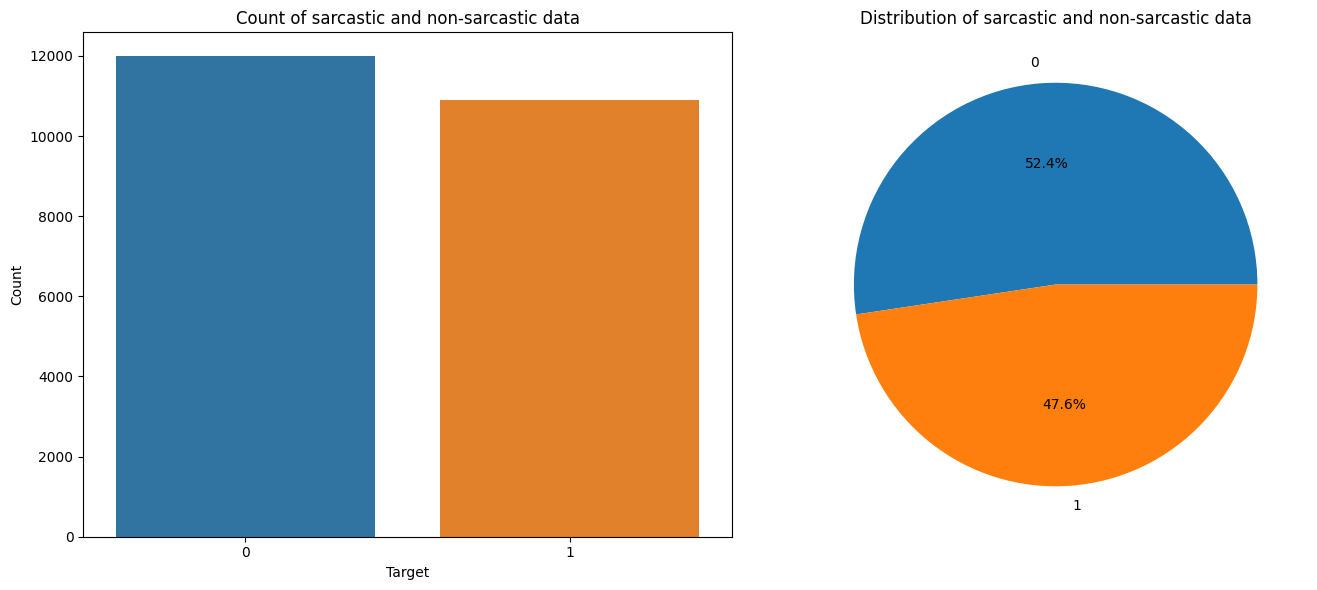

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print value counts
print(data.is_sarcastic.value_counts(), "\n")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot bar plot
sns.countplot(x="is_sarcastic", data=data, ax=ax[0])
ax[0].set_title("Count of sarcastic and non-sarcastic data")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Target")

# Plot pie chart
ax[1].pie(data["is_sarcastic"].value_counts().values, explode=[0, 0], labels=data.is_sarcastic.value_counts().index, autopct='%1.1f%%')
ax[1].set_title("Distribution of sarcastic and non-sarcastic data")

plt.tight_layout()
plt.show()


In [6]:
import nltk
import os
import zipfile

# Define the path for the NLTK data directory within /kaggle/working
nltk_data_dir = '/kaggle/working/nltk_data'

# Create the nltk_data directory if it doesn't exist
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Add the path of the nltk_data directory to the NLTK data path list
nltk.data.path.append(nltk_data_dir)

# Download the WordNet corpus
nltk.download('wordnet', download_dir=nltk_data_dir)



[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import zipfile
import os

# Define the path to the ZIP file
zip_file_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'  # Replace this with the path to your ZIP file

# Extract the directory where the ZIP file is located
extract_dir = os.path.dirname(zip_file_path)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed successfully.")


Extraction completed successfully.


In [8]:
from nltk.corpus import stopwords 
import re
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

#Removing punctiation marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing special characters
def remove_specialchars(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords and lemmatization
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)


#Total function
def cleaning(text):
    text = remove_punctuations(text)
    text = remove_specialchars(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

# data['headline']=data['headline'].apply(cleaning)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


There are 1449843 words in the combination of all review.


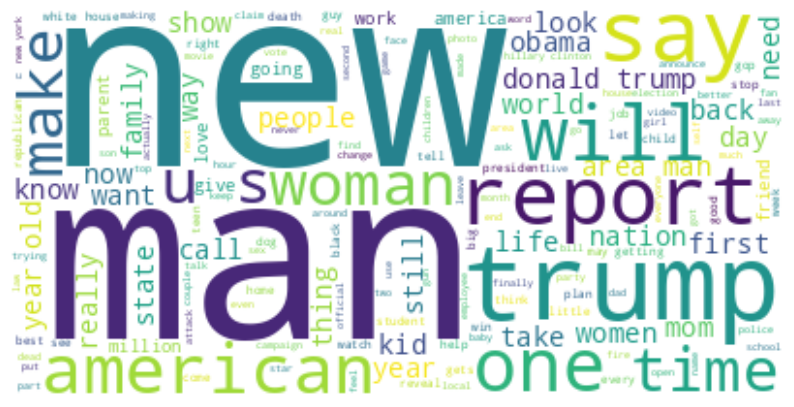

In [9]:
from wordcloud import WordCloud
text = " ".join(review for review in data.headline)
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
data['headline'][0]

'how trump really feels about queer people, explained in one sentence'

In [11]:
# Extract 'is_sarcastic' and 'headline' columns
labels = data['is_sarcastic'].values
sentences = data['headline'].values

In [12]:
def max_word_count(sentences):
    max_count = 0
    for sentence in sentences:
        words = sentence.split()
        word_count = len(words)
        if word_count > max_count:
            max_count = word_count
    return max_count

max_count = max_word_count(sentences)

# Print the result
print("Maximum word count:", max_count)


Maximum word count: 39


In [13]:
MAX_LENGTH = 50

In [14]:
def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length= MAX_LENGTH,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    
    ids.append(encoding['input_ids'])
  return ids

# **BERT BASE**

In [15]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)
#Train test split
train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.15)

train_ids = encoder(train_sents)
test_ids = encoder(test_sents) 


train_ids = tf.convert_to_tensor(train_ids)
test_ids = tf.convert_to_tensor(test_ids)
test_labels = tf.convert_to_tensor(test_labels)
train_labels = tf.convert_to_tensor(train_labels)

model = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(MAX_LENGTH,), dtype=tf.int32, name="input_word_ids")  
embedding = model([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)    

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)  

model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x = train_ids, y = train_labels, epochs = 2, verbose = 1, batch_size = 32, validation_data = (test_ids, test_labels))

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer  [(None, 50)]              0         
 )                                                               
                                                                 
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPo   109482240 
 )                           olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 50, 768),                        
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                   

I0000 00:00:1715888816.218923     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


609/609 [==============================] - 221s 239ms/step - loss: 0.3251 - accuracy: 0.8537 - val_loss: 0.2518 - val_accuracy: 0.8999
Epoch 2/2
609/609 [==============================] - 133s 218ms/step - loss: 0.1718 - accuracy: 0.9312 - val_loss: 0.1800 - val_accuracy: 0.9284


# **DistillBert**

In [16]:
from transformers import AutoTokenizer, AutoModel
from transformers import TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

#Train test split
train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.15)

train_ids = encoder(train_sents)
test_ids = encoder(test_sents) 

# Convert lists to numpy arrays
train_ids = np.array(train_ids)
test_ids = np.array(test_ids)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

def create_fine_tuned_model(num_labels=1):
    
    # Define additional fine-tuning layers
    dense1 = tf.keras.layers.Dense(256, activation='relu')
    dense2 = tf.keras.layers.Dense(128, activation='relu')
    output_layer = tf.keras.layers.Dense(num_labels, activation='sigmoid')

    # Initialize DistilBERT model
    distil_bert = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

    # Build the model
    inputs = tf.keras.Input(shape=(MAX_LENGTH,), dtype='int32')
    distil_bert_output = distil_bert(inputs)[0]
    x = dense1(distil_bert_output)
    x = dense2(x)
    outputs = output_layer(x)
    model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss = tf.keras.losses.BinaryCrossentropy() if num_labels == 1 else tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metrics = ['accuracy']
    model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model2

def fine_tune_model(model2, train_ids, train_labels, test_ids, test_labels, num_epochs=2, batch_size=16, validation_split=0.1):
    # Train the model
    history = model2.fit(train_ids, train_labels, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_ids, test_labels)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    return history


model2 = create_fine_tuned_model(num_labels=1)  # Change num_labels if you have multi-class classification
history1 = fine_tune_model(model2, train_ids, train_labels, test_ids, test_labels)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2
1095/1095 [==============================] - 118s 81ms/step - loss: 0.3079 - accuracy: 0.8648 - val_loss: 0.2230 - val_accuracy: 0.9162
Epoch 2/2
108/108 [==============================] - 19s 77ms/step - loss: 0.0953 - accuracy: 0.9651
Test Loss: 0.09527920931577682
Test Accuracy: 0.9650654792785645


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
plot_graphs(history1, 'accuracy')
plot_graphs(history1, 'loss')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


    
# Determine label based on prediction (assuming rounding for binary classification)
bert_pred = model.predict(test_ids)
label = np.round(bert_pred) 


In [ ]:
# Make predictions using model1

class_labels = ['Not Sarcastic', 'Sarcastic']
# Calculate accuracy
accuracy_model1 = accuracy_score(test_labels, label)

# Generate confusion matrix
cm_model1 = confusion_matrix(test_labels, label)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model1, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Model 1")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display accuracy table
print("Accuracy of Model 1:", accuracy_model1)

from sklearn.metrics import classification_report

# Generate classification report
report_model1 = classification_report(test_labels, label, target_names=class_labels)

# Display classification report
print("Classification Report - Model 1:")
print(report_model1)

In [ ]:
test_data = pd.read_csv("/kaggle/input/sarcasmdetect/test_data.csv")
test_data.rename(columns={'text': 'headline'}, inplace=True)
sentences = test_data['headline'].values
sentences = np.array(sentences)
test_data_ids = encoder(sentences)
test_data_ids = tf.convert_to_tensor(test_data_ids)
predictions1 = model.predict(test_data_ids)
predictions2 = model2.predict(test_data_ids)
combined_predictions = (predictions1 + predictions2) / 2
(combined_predictions)
result_df = pd.DataFrame(columns=['ID', 'label'])

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
    # Get the ID from the current row
    id_value = row['ID']
    
    # Get the corresponding prediction
    prediction = combined_predictions[index]  # Assuming predictions are in the same order as the DataFrame
    
    # Determine label based on prediction (assuming rounding for binary classification)
    label = round(prediction[0])  # Assuming prediction is a single value
    
    # Add a new row to the DataFrame
    result_df.loc[index] = [id_value, label]

# Export the DataFrame to a CSV file
result_df.to_csv("predictions.csv", index=False)

In [ ]:
sentences = test_data['headline'].values
sentences = np.array(sentences)
test_data_ids = encoder(sentences)
test_data_ids = tf.convert_to_tensor(test_data_ids)
predictions1 = model.predict(test_data_ids)
predictions2 = model2.predict(test_data_ids)
combined_predictions = (predictions1 + predictions2) / 2
(combined_predictions)
result_df = pd.DataFrame(columns=['ID', 'label'])

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
    # Get the ID from the current row
    id_value = row['ID']
    
    # Get the corresponding prediction
    prediction = combined_predictions[index]  # Assuming predictions are in the same order as the DataFrame
    
    # Determine label based on prediction (assuming rounding for binary classification)
    label = round(prediction[0])  # Assuming prediction is a single value
    
    # Add a new row to the DataFrame
    result_df.loc[index] = [id_value, label]

# Export the DataFrame to a CSV file
result_df.to_csv("predictions.csv", index=False)

In [ ]:
predictions1 = model.predict(test_data_ids)
predictions2 = model2.predict(test_data_ids)
combined_predictions = (predictions1 + predictions2) / 2
(combined_predictions)
result_df = pd.DataFrame(columns=['ID', 'label'])

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
    # Get the ID from the current row
    id_value = row['ID']
    
    # Get the corresponding prediction
    prediction = combined_predictions[index]  # Assuming predictions are in the same order as the DataFrame
    
    # Determine label based on prediction (assuming rounding for binary classification)
    label = round(prediction[0])  # Assuming prediction is a single value
    
    # Add a new row to the DataFrame
    result_df.loc[index] = [id_value, label]

# Export the DataFrame to a CSV file
result_df.to_csv("predictions.csv", index=False)

In [ ]:
combined_predictions = (predictions1 + predictions2) / 2
(combined_predictions)
result_df = pd.DataFrame(columns=['ID', 'label'])

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
    # Get the ID from the current row
    id_value = row['ID']
    
    # Get the corresponding prediction
    prediction = combined_predictions[index]  # Assuming predictions are in the same order as the DataFrame
    
    # Determine label based on prediction (assuming rounding for binary classification)
    label = round(prediction[0])  # Assuming prediction is a single value
    
    # Add a new row to the DataFrame
    result_df.loc[index] = [id_value, label]

# Export the DataFrame to a CSV file
result_df.to_csv("predictions.csv", index=False)

In [ ]:
(combined_predictions)
result_df = pd.DataFrame(columns=['ID', 'label'])

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
    # Get the ID from the current row
    id_value = row['ID']
    
    # Get the corresponding prediction
    prediction = combined_predictions[index]  # Assuming predictions are in the same order as the DataFrame
    
    # Determine label based on prediction (assuming rounding for binary classification)
    label = round(prediction[0])  # Assuming prediction is a single value
    
    # Add a new row to the DataFrame
    result_df.loc[index] = [id_value, label]

# Export the DataFrame to a CSV file
result_df.to_csv("predictions.csv", index=False)

In [ ]:
result_df = pd.DataFrame(columns=['ID', 'label'])

# Iterate over each row in the DataFrame
for index, row in test_data.iterrows():
    # Get the ID from the current row
    id_value = row['ID']
    
    # Get the corresponding prediction
    prediction = combined_predictions[index]  # Assuming predictions are in the same order as the DataFrame
    
    # Determine label based on prediction (assuming rounding for binary classification)
    label = round(prediction[0])  # Assuming prediction is a single value
    
    # Add a new row to the DataFrame
    result_df.loc[index] = [id_value, label]

# Export the DataFrame to a CSV file
result_df.to_csv("predictions.csv", index=False)